In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# Defining functions required for the analysis

def top_spending_customer(dataframe: pd.DataFrame, n: int = 5):
    """Returns the top N customers by total spending.

    Args:
        dataframe (pd.DataFrame): A DataFrame containing:
                                - 'Customer ID' (str or int): Unique identifier for customers.
                                - 'Total Amount' (numeric): The amount spent by each customer in transactions.
        n (int, optional): The number of top customers to return. Defaults to 5.
    """

    # Step 1: Group by Customer ID and Aggregate total spending per customer
    customer_spending = dataframe.groupby(by= 'Customer ID').agg(Sum_Spending= ('Total Amount', 'sum')).reset_index()

    # Step 2: Sort by total spending in descending order and return the top N.
    top_customers = customer_spending.sort_values(by= 'Sum_Spending', ascending=False).head(n)

    return top_customers

def total_revenue_month_year(dataframe: pd.DataFrame, month: int, year: int) -> pd.DataFrame:
    """Calculates the total revenue for a given month and year.

    Args:
        dataframe (pd.DataFrame):  A DataFrame containing at least a 'Date' column and a 'Total Amount' column.
        month (int): The month (1-12) for which to calculate revenue.
        year (int): The year for which to calculate revenue.

    Returns:
        pd.DataFrame: The total revenue for a selected month and year.
    """
    # Step 1: Extract month and year into new columns
    dataframe['Month'] = pd.to_datetime(dataframe['Date']).dt.month
    dataframe['Year'] = pd.to_datetime(dataframe['Date']).dt.year

    #Step 2: Filter data to only include the selected month and year
    filtered_dataframe = dataframe[(dataframe['Year'] == year) & (dataframe['Month'] == month)]

    #Step 3: Calculate total revenue for that time period
    tr_month_year = filtered_dataframe.groupby(['Month', 'Year']).agg(Total_Revenue_Month_Year = ('Total Amount', 'sum')).reset_index()
    
    return tr_month_year


def popular_product_gender(dataframe: pd.DataFrame) -> pd.DataFrame:
    """Finds the most popular product category by gender.

    Args:
        dataframe (pd.DataFrame): - 'Gender' (categorical: Male, Female, etc.)
                                - 'Product Category' (categorical: product categories)
    Returns:
        pd.DataFrame: The most popular category by gender.                            
    """

    # Step 1: Group by gender and product category, summing the purchase amounts
    popular_by_gender = dataframe.groupby(['Gender', 'Product Category'])['Total Amount'].sum().reset_index()

    # Step 2: For each gender, find the category with the highest total amount
    most_popular_product = popular_by_gender.loc[popular_by_gender.groupby('Gender')['Total Amount'].idxmax()]

    return most_popular_product

In [11]:
sales_df = pd.read_csv("retail_sales_dataset.csv")
print("Number of missing values:", sales_df.isna().sum())
print("\n")
print("Number of duplicated values:", sales_df.duplicated().sum())
print("\n")
print("Types of columns:", sales_df.dtypes)

sales_df['Date'] = pd.to_datetime(sales_df['Date'])

Number of missing values: Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


Number of duplicated values: 0


Types of columns: Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


In [12]:
total_revenue = sales_df['Total Amount'].sum()
print(f"The total revenue of the company is {total_revenue}.")

The total revenue of the company is 456000.


In [14]:
freq_purchased_prod = sales_df.groupby(by= 'Product Category').agg(Most_Purchased_Product = ('Quantity', 'sum')).reset_index()
most_freq_purchased_prod = freq_purchased_prod.iloc[freq_purchased_prod['Most_Purchased_Product'].idxmax()]['Product Category']
most_freq_purchased_prod
print("The most purchased product category is:", most_freq_purchased_prod)

The most purchased product category is: Clothing


In [18]:
# Average purchase amount per customer
avg_purchased_customer = sales_df.groupby(by='Customer ID').agg(Avg_Purchase_Customer = ('Total Amount', 'mean')).reset_index 

In [25]:
# Calculating the average spending per gender
avg_purchase_gender = sales_df.groupby(by='Gender').agg(avg_purchase_gender=('Total Amount', 'mean')).reset_index()
avg_purchase_gender = round(avg_purchase_gender, 2) 
avg_purchase_gender

,Gender,avg_purchase_gender
0,Female,456.55
1,Male,455.43


In [26]:
# Calculating which age group spends the most
Most_Purchase_Age = sales_df.groupby(by='Age').agg(Most_Purchase_Age=('Total Amount', 'sum')).reset_index()
top_purchase_age = Most_Purchase_Age.sort_values(by='Most_Purchase_Age').head(1)
top_purchase_age

,Age,Most_Purchase_Age
21,39,4595


In [28]:
# Analyzing seasonal trends in sales (monthly analysis)
sales_df['Month'] = pd.to_datetime(sales_df['Date']).dt.month
monthly_analysis = sales_df.groupby(by='Month').agg(Monthly_Sales=('Total Amount', 'sum')).reset_index()
monthly_analysis.sort_values(by='Month').reset_index(drop=True)

,Month,Monthly_Sales
0,1,36980
1,2,44060
2,3,28990
3,4,33870
4,5,53150
5,6,36715
6,7,35465
7,8,36960
8,9,23620
9,10,46580


In [29]:
# Bar Chart: Purchases by months
px.bar(monthly_analysis, x='Month', y='Monthly_Sales')

In [31]:
# Extracting all transactions where the Total Amount is above $500.
transactions_above_500 = sales_df[sales_df['Total Amount'] > 500]
transactions_above_500

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600,12
12,13,2023-08-05,CUST013,Male,22,Electronics,3,500,1500,8
14,15,2023-01-16,CUST015,Female,42,Electronics,4,500,2000,1
15,16,2023-02-17,CUST016,Male,19,Clothing,3,500,1500,2
...,...,...,...,...,...,...,...,...,...,...
975,976,2023-10-10,CUST976,Female,48,Beauty,2,300,600,10
985,986,2023-01-17,CUST986,Female,49,Clothing,2,500,1000,1
986,987,2023-04-29,CUST987,Female,30,Clothing,3,300,900,4
989,990,2023-05-25,CUST990,Female,58,Beauty,2,500,1000,5


In [35]:
# Retrieving all transactions for customer ID CUST996
transactions_by_ID = sales_df.loc[sales_df['Customer ID'] == 'CUST996']
transactions_by_ID

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,5


In [36]:
# Finding all transactions for customers aged 30-40 who bought from "Electronics".
transactions_by_30_40 = sales_df.loc[(sales_df['Age'] >= 30) & (sales_df['Age'] <= 40) & (sales_df['Product Category'] == 'Electronics')]
transactions_by_30_40

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100,2
52,53,2023-07-13,CUST053,Male,34,Electronics,2,50,100,7
53,54,2023-02-10,CUST054,Female,38,Electronics,3,500,1500,2
80,81,2023-05-17,CUST081,Male,40,Electronics,1,50,50,5
83,84,2023-11-28,CUST084,Female,38,Electronics,3,30,90,11
...,...,...,...,...,...,...,...,...,...,...
915,916,2023-12-24,CUST916,Female,32,Electronics,1,50,50,12
976,977,2023-02-08,CUST977,Female,35,Electronics,3,25,75,2
979,980,2023-07-29,CUST980,Female,31,Electronics,3,25,75,7
980,981,2023-08-19,CUST981,Female,30,Electronics,2,30,60,8


# Using pre-defined functions

In [37]:
# Finding the top N customers by their spending
top_spending_customer(sales_df, n=4)

,Customer ID,Sum_Spending
487,CUST487,2000
476,CUST476,2000
773,CUST773,2000
503,CUST503,2000


In [38]:
# Finding the most popular product category per gender based on their total spendings
popular_product_gender(dataframe= sales_df)

,Gender,Product Category,Total Amount
1,Female,Clothing,81275
5,Male,Electronics,80170


In [39]:
# Calculating the total revenue for a certain month and year
total_revenue_month_year(dataframe= sales_df, month= 1, year= 2023)

,Month,Year,Total_Revenue_Month_Year
0,1,2023,35450


# Data Visualisations

In [41]:
# Line Plot: Total sales over time
daily_sales = sales_df.groupby(by='Date').agg(Daily_Sales_Sum=('Total Amount', 'sum')).reset_index()
fig = px.line(daily_sales, x="Date", y="Daily_Sales_Sum", title='Total Sales Over Time')
fig.show()

In [42]:
# Histogram: Distribution of total purchase amounts
px.histogram(sales_df, x='Total Amount', nbins=5, title='Binning Distribution of Total Purchase Amounts')

In [45]:
# Bar Chart: Top 2 product categories by revenue
product_cat_revenue = sales_df.groupby(by='Product Category').agg(Categories_Revenue=('Total Amount', 'sum')).reset_index()
sorted_product_cat_revenue = product_cat_revenue.sort_values(by=['Categories_Revenue'], ascending=False)
px.bar(sorted_product_cat_revenue.head(2), x='Product Category', y='Categories_Revenue')

In [46]:
#Bar Chart: Purchase amount distribution across different age groups  
sales_df['Age_Bin'] = pd.cut(x=sales_df['Age'], bins=[0, 18, 25, 35, 45, 55, 65, float('inf')], right=True)
purchase_amount_by_age = sales_df.groupby(by='Age_Bin').agg(Purchase_By_Age=('Total Amount', 'sum')).reset_index()
purchase_amount_by_age["Age_Bin"] = purchase_amount_by_age["Age_Bin"].astype(str)
px.bar(purchase_amount_by_age, x='Age_Bin', y='Purchase_By_Age')

C:\Users\monik\AppData\Local\Temp\ipykernel_8304\2436221464.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



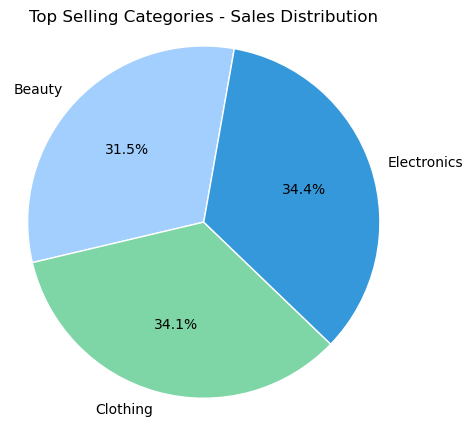

In [47]:
# Find and plot sales trends for the top-selling product category  
topselling_category = sales_df.groupby(by='Product Category').agg(Sales_Trends=('Total Amount', 'sum')).reset_index()
top_category = topselling_category.iloc[topselling_category['Sales_Trends'].idxmax()]['Product Category']

custom_colors = ["#A2CFFE", "#7ED6A7", "#3498DB", "#A9DFBF"]

plt.figure(figsize=(5, 5))
plt.pie(
    topselling_category["Sales_Trends"],
    labels=topselling_category["Product Category"],
    autopct='%1.1f%%',
    startangle=80,
    colors=custom_colors,
    wedgeprops={'edgecolor': 'white'}
)
plt.title("Top Selling Categories - Sales Distribution")
plt.axis('equal')  # Equal aspect ratio makes the pie chart circular
plt.show()

In [48]:
# Plot the total sales of electronics over time
filtered_df_electronics = sales_df.loc[sales_df['Product Category'] == 'Electronics']
total_sales_prod_cat = filtered_df_electronics.groupby(by='Date').agg(Total_Sales=('Total Amount', 'sum')).reset_index()

fig = px.line(total_sales_prod_cat, x="Date", y="Total_Sales", title='Total Sales of Electronics Over Time')
fig.show()

In [51]:
# Visualize sales trends during Easter period
filtered_dates_easter = sales_df.loc[(sales_df['Date'] >= '2023-04-03') & (sales_df['Date'] <= '2023-04-10')]
filtered_total_revenue_easter = filtered_dates_easter.groupby(by='Date').agg(Daily_Sum_Easter = ('Total Amount', 'sum')).reset_index()
fig = px.line(filtered_total_revenue_easter, x= "Date", y= "Daily_Sum_Easter", title= 'Sales Trends During Easter Period')
fig.show()

In [54]:
# Visualize sales trends during Christmas period

filtered_dates_christmas = sales_df.loc[(sales_df['Date'] >= '2023-12-18') & (sales_df['Date'] <= '2023-12-27')]
filtered_total_revenue_christmas = filtered_dates_christmas.groupby(by='Date').agg(Daily_Sum_Christmas=('Total Amount', 'sum')).reset_index()
fig = px.line(filtered_total_revenue_christmas, x="Date", y="Daily_Sum_Christmas", title='Sales Trends During Christmas Period')
fig.show()

In [57]:
# Visualize sales trends during Easter period per product category
daily_revenue_product_easter = filtered_dates_easter.groupby(['Date', 'Product Category']).agg(Daily_Sum_Product_Easter_Period=('Total Amount', 'sum')).reset_index()
fig = px.line(daily_revenue_product_easter, x="Date", y="Daily_Sum_Product_Easter_Period", color="Product Category")
fig.show()

In [58]:
# Visualize sales trends during Christmas period for per product category 
filtered_df_christmas = sales_df.loc[(sales_df['Date'] >= '2023-12-18') & (sales_df['Date'] <= '2023-12-27')]
daily_revenue_product_christmas = filtered_df_christmas.groupby(['Date', 'Product Category']).agg(Daily_Sum_Product_Christmas_Period=('Total Amount', 'sum')).reset_index()
fig = px.line(daily_revenue_product_christmas, x="Date", y="Daily_Sum_Product_Christmas_Period", color="Product Category")
fig.show()

# Insights & Business Recommendations
- The company generated a total revenue of $456,000 during the analysis period.
- Clothing emerged as the most frequently purchased product category overall, indicating strong consumer interest.
- On average, female customers spend more per transaction compared to male customers, suggesting a valuable target demographic.
- The 43-year-old age group recorded the highest average spending, highlighting a key customer segment for premium or targeted offerings.
- May (Month 5) saw the highest total revenue, signaling a seasonal or promotional opportunity worth exploring further.
- Electronics was the most preferred category among male customers, whereas Clothing was the top choice for females, indicating gender-based product preferences that could inform marketing and inventory strategies.
